# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/alpha/.conda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

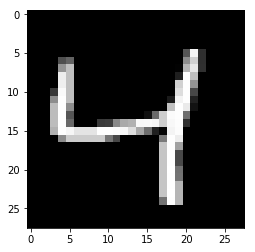

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [10]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
original_dim = 784

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, [None, original_dim])
targets_ = tf.placeholder(tf.float32, [None, original_dim])

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs=inputs_, units=encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(inputs=encoded, units=original_dim)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [11]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [12]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6949
Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6890
Epoch: 1/20... Training loss: 0.6856
Epoch: 1/20... Training loss: 0.6818
Epoch: 1/20... Training loss: 0.6767
Epoch: 1/20... Training loss: 0.6708
Epoch: 1/20... Training loss: 0.6637
Epoch: 1/20... Training loss: 0.6550
Epoch: 1/20... Training loss: 0.6451
Epoch: 1/20... Training loss: 0.6341
Epoch: 1/20... Training loss: 0.6222
Epoch: 1/20... Training loss: 0.6079
Epoch: 1/20... Training loss: 0.5925
Epoch: 1/20... Training loss: 0.5770
Epoch: 1/20... Training loss: 0.5592
Epoch: 1/20... Training loss: 0.5413
Epoch: 1/20... Training loss: 0.5251
Epoch: 1/20... Training loss: 0.5107
Epoch: 1/20... Training loss: 0.4892
Epoch: 1/20... Training loss: 0.4679
Epoch: 1/20... Training loss: 0.4528
Epoch: 1/20... Training loss: 0.4349
Epoch: 1/20... Training loss: 0.4185
Epoch: 1/20... Training loss: 0.4033
Epoch: 1/20... Training loss: 0.3937
Epoch: 1/20... Training loss: 0.3865
E

Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1870
Epoch: 1/20... Training loss: 0.1949
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1952
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1801
Epoch: 1/20... Training loss: 0.1948
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1830
Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1979
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1858
Epoch: 1/20... Training loss: 0.1784
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1818
E

Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1506
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1488
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1505
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1543
E

Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1357
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1418
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1332
E

Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1280
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1243
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1256
E

Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1185
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1174
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1184
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1150
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1188
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1172
E

Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1033
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1152
Epoch: 5/20... Training loss: 0.1127
E

Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1103
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1053
E

Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1064
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.0972
E

Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1018
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0980
E

Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.1036
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.1025
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.1010
Epoch: 9/20... Training loss: 0.0957
E

Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0918
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0942
E

Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0912
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0982
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0989
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0887
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0994
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0988
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0904
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0986
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.1005
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0949
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0970
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0997
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

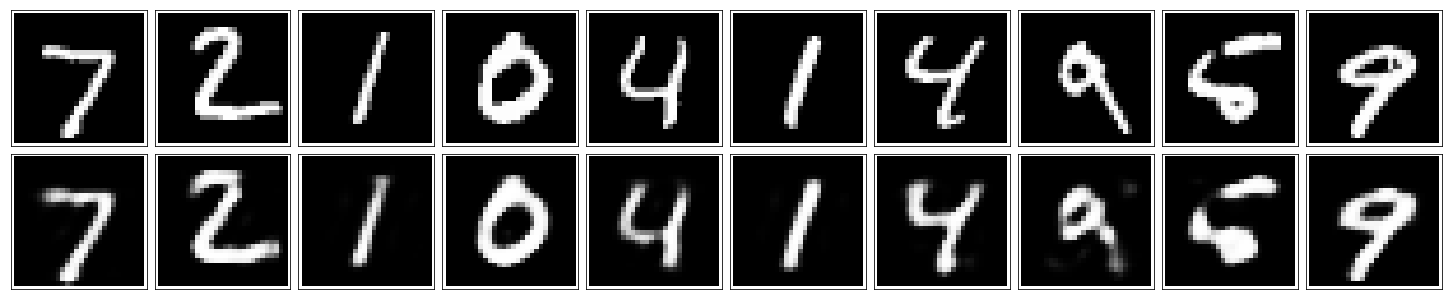

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [14]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.